Notebook correspondant à la section 2.3 du rapport.
Implémentation de résolution numérique approchée de l'équation :
$\frac{dM}{dt} = f(t,M), 
M(0) = M_0$
à l'aide d'un réseau de neurones avec une couche cachée et des
fonctions d'activation sigmoid

In [437]:
#imports
from numpy import pi, cos, sin, dot, zeros, linspace, sum, array, arange, concatenate, exp, log
from numpy import sum as np_sum
from numpy.random import randn
from numpy import math
from matplotlib.pyplot import plot, legend, title, show

Données du problème

In [438]:
#bornes de l'intervalle
t_a = -1
t_b = 1

lamb = 0.3
W=2*pi

#condition initiale
M_0 = 0

#fonction définissant l'équation différentielle
def f(t,M) :
    return lamb*W*(M**2-1)#exp(t)

def df_dM(t,M) :
    """renvoie df/dM (t,M)"""
    return lamb*W*2*M
    

Fonctions calculant respectivement la sortie du réseau de neurones, l'erreur, et le gradient de l'erreur

In [439]:
def M(Mat_T, M_0, A, H, N) :
    #Calcule la sortie du réseau de neurones
    return M_0 + array([dot(A, Mat_T[1:,i]) for i in range(N)])


def calcError(Mat_T, M_0, A, f, H, N) :
    #Calcule l'erreur
    E = 0

    for i in range(N):     
        M_i = M_0 + dot(A, Mat_T[1:,i])
        e = dot(arange(1, H+1)*A, Mat_T[:H,i]) - f(Mat_T[1,i], M_i)
        E += e**2
        #print(Mat_T[1,i], M_i, dot(arange(1, H+1)*A, Mat_T[:H,i]), f(Mat_T[1,i], M_i), e**2)
    return E/N


def calcGrad(Mat_T, M_0, A, f, df_dM, H, N) :
    #calcule le gradient de l'erreur par rapport
    grad = zeros(H)
    #print("Calcul gradient :")
    for i in range(N):  
        M_i = M_0 + dot(A, Mat_T[1:,i])
        e = dot(arange(1, H+1)*A, Mat_T[:H,i]) - f(Mat_T[1,i], M_i)
        df = df_dM(Mat_T[1,i], M_i)
        de_dA = Mat_T[:H,i]*(arange(1, H+1)-Mat_T[1,i]*df)
        grad += 2*e*de_dA
        #print("i={}, t={}, M={}, M'={}".format(i,Mat_T[1,i], M_i, dot(arange(1, H+1)*A, Mat_T[:H,i])))
        #print("e={}, df={}, de_dA={}".format(e,df,de_dA))

    return grad/N


Définition des paramètres du modèle

In [445]:
N = 50 # nombre de points pour la variable indépendante
T = linspace(t_a,t_b,N) #liste des points de tests


H = 10 # nombre de termes de la série entière


Mat_T = array([T**k for k in range(H+1)])


#initialisation des paramètres
A = randn((H))
#A= array([1/math.factorial(n+1) for n in range(H)])
#A = concatenate((array([-0.21896834 ,-0.39013792 , 1.28006596  ,1.10460148 ,-0.92779849 ,-0.38041741,
# -0.35875123, -1.21436223 , 0.24003756 , 0.85437342]), zeros(10)))


In [459]:
epochs = 10000 #nombre d'itérations
alpha = 1e-2 #taux d'apprentissage pour la descente de gradients

Entraînement du modèle

In [460]:
for k in range(epochs) :
    if (k%1000 == 0) :
        print("Erreur après",k,"itérations :", calcError(Mat_T, M_0, A, f, H, N))
    A -= alpha*calcGrad(Mat_T, M_0, A, f, df_dM, H, N)

Erreur après 0 itérations : 0.010996521332573181
Erreur après 1000 itérations : 0.00833736990393942
Erreur après 2000 itérations : 0.006612672751343205
Erreur après 3000 itérations : 0.005487328379237787
Erreur après 4000 itérations : 0.004746691553750215
Erreur après 5000 itérations : 0.004253362954947208
Erreur après 6000 itérations : 0.0039194065087819535
Erreur après 7000 itérations : 0.0036885260058728705
Erreur après 8000 itérations : 0.0035246505716016036
Erreur après 9000 itérations : 0.0034046340610176286


Affichage des résulats trouvés :

In [461]:
print()
print("Erreur finale après",epochs,"itérations",calcError(Mat_T, M_0, A, f, H, N))
print("paramètres trouvés :",A)

#save((w,b,v), 'H = '+str(H)+', E = '+str(int(calcError(w, b, v))))


Erreur finale après 10000 itérations 0.003313590134931397
paramètres trouvés : [-1.78373722  0.13006714  1.22283106 -0.75266238  0.25322437  1.56909959
 -1.29129458 -1.39688984  0.64261712  0.4508481 ]


Affichage graphique de la solution trouvée :

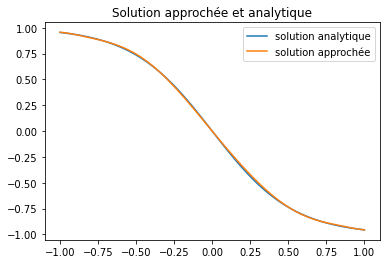

In [462]:
#solution trouvée
Y = M(Mat_T, M_0, A, H, N) 

#solution analytique
K = (M_0-1) / (M_0+1)
Kexp = K*exp(2*lamb*W*Mat_T[1])
Z = (1+Kexp) / (1-Kexp)
#Z = [exp(t) for t in Mat_T[1]]

plot(T,Z, label='solution analytique')
plot(T,Y, label='solution approchée')
legend()
title('Solution approchée et analytique')
show()